<a href="https://colab.research.google.com/github/arishp/srm-ap-genai-2024/blob/main/03_Fundamentals_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from dotenv import load_dotenv
load_dotenv()

True

In [12]:
import os
os.environ['LANGSMITH_TRACING'] = 'true'
os.environ['LANGSMITH_ENDPOINT'] = "https://api.smith.langchain.com"
os.environ['LANGSMITH_PROJECT'] = "2025-vitap"

In [13]:
from langchain_groq import ChatGroq
llm = ChatGroq(api_key=os.environ["GROQ_API_KEY"], model_name='gemma2-9b-it')
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x1134a6d50>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x1134f8f50>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [14]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [15]:
class State(TypedDict):
  messages: Annotated[list, add_messages]

In [16]:
graph_builder = StateGraph(State)

In [17]:
def chatbot(state:State):
    return {"messages": [llm.invoke(state["messages"])]}

In [ ]:
graph_builder.add_node('chatbot', chatbot)

In [19]:
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)
app = graph_builder.compile()

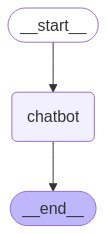

In [20]:
from IPython.display import Image, display
try:
  display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [15]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ['quit', 'q']:
    print('good bye')
    break
  for event in app.stream({'messages': ("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:", value['messages'].content)

dict_values([{'messages': AIMessage(content='Hello! 👋  How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001903577, 'queue_time': 0.236033504, 'total_time': 0.029176304}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-5d743de5-04f5-48d3-a0ec-4054e22f4929-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26})}])
content='Hello! 👋  How can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001903577, 'queue_time': 0.236033504, 'total_time': 0.029176304}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-5d743de5-04f5-48d3-a0ec-4